## Crawler code

In [3]:
import requests
from bs4 import BeautifulSoup
from collections import deque
from IPython.display import Image, display
import os
import urllib


# Extracting attributes
def extract_text(soup):
    text = soup.get_text()
    num = int(input('How many words you want to see? '))
    print('Text:', text.split()[:num])


# Extracting images
def extract_images(soup):
    images = soup.find_all('img')
    i = 0
    num = int(input('How many pictures you want to download? '))
    for img in images:
        i += 1
        if i == num + 1: break
        img_url = img['src']
        if img_url[0] == img_url[1] == '/':
           img_url = 'https:' + img_url
        elif img_url[0] == '/' and img_url[1] != '/':
           img_url = 'https:/' + img_url
        else: return 0
        img_name = img_url.split('/')[-1]
        try:
            urllib.request.urlretrieve(img_url, img_name)
            img_resp = requests.get(img_url)
            display(Image(img_resp.content))
            print('Image downloaded:', img_url)
        except:
            print(f'couldn\'t download {img_url}')


# Extracting audio
def extract_audio(soup):
    audio = soup.find_all('audio')
    i = 0
    num = int(input('How many audios you want to download? '))
    for aud in audio:
        i += 1
        if i == num + 1: break
        aud_url = next(iter(aud))['src']
        if aud_url[0] == aud_url[1] == '/':
           aud_url = 'https:' + aud_url
        elif aud_url[0] == '/' and aud_url[1] != '/':
           aud_url = 'https:/' + aud_url
        else: return 0
        aud_name = aud_url.split('/')[-1]
        print(aud_url, aud_name)
        try:
            urllib.request.urlretrieve(aud_url, aud_name)
            print('Audio downloaded:', aud_url)
        except:
            print(f'couldn\'t download {aud_url}')


#  Depth first crawler function
def depth_first_crawler(url, max_depth, opts, visited=set()):
    if max_depth == 0 or url in visited:
        return

    visited.add(url)
    print("Visiting page:", url)

    response = requests.get(url)
    content = response.text

    soup = BeautifulSoup(content, 'html.parser')
    links = soup.find_all('a')
    if opts[0] == 1:
      extract_text(soup)
    if opts[1] == 1:
      extract_images(soup)
    if opts[2] == 1:
      extract_audio(soup)

    for link in links:
        href = link.get('href')
        if href is not None:
            if href.startswith("http://") or href.startswith("https://"):
              new_url = href
            else:
              new_url = url.rstrip('/') + '/' + href.lstrip('/')
            depth_first_crawler(new_url, max_depth - 1, opts, visited)
            break


# Breadth first crawler function
def breadth_first_crawler(start_url, max_pages, opts):
    visited = set()
    queue = deque([(start_url, 0)])
    page = 1

    while queue and page <= max_pages:
        url, depth = queue.popleft()

        if url in visited:
            continue

        visited.add(url)
        print("Visiting page:", url)

        response = requests.get(url)
        content = response.text

        soup = BeautifulSoup(content, 'html.parser')
        links = soup.find_all('a')
        if opts[0] == 1:
          extract_text(soup)
        if opts[1] == 1:
          extract_images(soup)
        if opts[2] == 1:
          extract_audio(soup)

        for link in links:
            href = link.get('href')
            if href is None:
                continue
            if href.startswith("http://") or href.startswith("https://"):
              new_url = href
            else:
              new_url = url.rstrip('/') + '/' + href.lstrip('/')

            if new_url is not None and new_url not in visited:
                queue.append((new_url, depth + 1))

        page += 1


# Interface
def crawler():
  print('Hello! I am a web-crawler! ')
  while 1:
    inp = input('\n I can do the following: \n 1 - do depth first search \n 2 - do breadth first search \n x - exit \n')
    if inp == '1':
      url = input('Enter start url: ')
      depth = input('Enter the depth: ')
      opts = []
      opts.append(int(input('Do you want to see attributes? 0 - no, 1 - yes: ')))
      opts.append(int(input('Do you want to see pictures? 0 - no, 1 - yes: ')))
      opts.append(int(input('Do you want to see audio? 0 - no, 1 - yes: ')))
      depth_first_crawler(url, int(depth), opts)
      print('Finished')
    elif inp == '2':
      url = input('Enter start url: ')
      depth = input('Enter the breadth: ')
      opts = []
      opts.append(int(input('Do you want to see attributes? 0 - no, 1 - yes: ')))
      opts.append(int(input('Do you want to see pictures? 0 - no, 1 - yes: ')))
      opts.append(int(input('Do you want to see audio? 0 - no, 1 - yes: ')))
      breadth_first_crawler(url, int(depth), opts)
      print('Finished')
    elif inp == 'x':
      break
    else:
      print('Error, try again')

## Call this function to start crawling
#crawler()

## Example of usage

Hello! I am a web-crawler! 

 I can do the following: 
 1 - do depth first search 
 2 - do breadth first search 
 x - exit 
1
Enter start url: https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F
Enter the depth: 2
Do you want to see attributes? 0 - no, 1 - yes: 1
Do you want to see pictures? 0 - no, 1 - yes: 1
Do you want to see audio? 0 - no, 1 - yes: 1
Visiting page: https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F
How many words you want to see? 3
Text: ['Россия', '—', 'Википедия']
How many pictures you want to download? 2


Image downloaded: https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Font_Awesome_5_solid_volume-up.svg/18px-Font_Awesome_5_solid_volume-up.svg.png


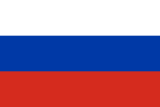

Image downloaded: https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Flag_of_Russia.svg/160px-Flag_of_Russia.svg.png
How many audios you want to download? 2
https://upload.wikimedia.org/wikipedia/commons/f/fc/Russian_Anthem_chorus.ogg Russian_Anthem_chorus.ogg
Audio downloaded: https://upload.wikimedia.org/wikipedia/commons/f/fc/Russian_Anthem_chorus.ogg
https://upload.wikimedia.org/wikipedia/commons/7/72/Ru-Russia_part_1_Intro.ogg Ru-Russia_part_1_Intro.ogg
Audio downloaded: https://upload.wikimedia.org/wikipedia/commons/7/72/Ru-Russia_part_1_Intro.ogg
Visiting page: https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F/wiki/%D0%A1%D0%BB%D1%83%D0%B6%D0%B5%D0%B1%D0%BD%D0%B0%D1%8F:Map/3/66/94/ru
How many words you want to see? 2
Text: ['Россия/wiki/Служебная:Map/3/66/94/ru', '—']
How many pictures you want to download? 1


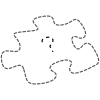

Image downloaded: https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Wiki_letter_w_dashed.svg/100px-Wiki_letter_w_dashed.svg.png
How many audios you want to download? 1
Finished

 I can do the following: 
 1 - do depth first search 
 2 - do breadth first search 
 x - exit 
2
Enter start url: https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F
Enter the breadth: 3
Do you want to see attributes? 0 - no, 1 - yes: 1
Do you want to see pictures? 0 - no, 1 - yes: 1
Do you want to see audio? 0 - no, 1 - yes: 1
Visiting page: https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F
How many words you want to see? 3
Text: ['Россия', '—', 'Википедия']
How many pictures you want to download? 2


Image downloaded: https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Font_Awesome_5_solid_volume-up.svg/18px-Font_Awesome_5_solid_volume-up.svg.png


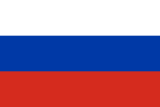

Image downloaded: https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Flag_of_Russia.svg/160px-Flag_of_Russia.svg.png
How many audios you want to download? 2
https://upload.wikimedia.org/wikipedia/commons/f/fc/Russian_Anthem_chorus.ogg Russian_Anthem_chorus.ogg
Audio downloaded: https://upload.wikimedia.org/wikipedia/commons/f/fc/Russian_Anthem_chorus.ogg
https://upload.wikimedia.org/wikipedia/commons/7/72/Ru-Russia_part_1_Intro.ogg Ru-Russia_part_1_Intro.ogg
Audio downloaded: https://upload.wikimedia.org/wikipedia/commons/7/72/Ru-Russia_part_1_Intro.ogg
Visiting page: https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F/wiki/%D0%A1%D0%BB%D1%83%D0%B6%D0%B5%D0%B1%D0%BD%D0%B0%D1%8F:Map/3/66/94/ru
How many words you want to see? 6
Text: ['Россия/wiki/Служебная:Map/3/66/94/ru', '—', 'Википедия', 'Россия/wiki/Служебная:Map/3/66/94/ru', 'Материал', 'из']
How many pictures you want to download? 2


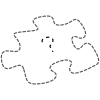

Image downloaded: https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Wiki_letter_w_dashed.svg/100px-Wiki_letter_w_dashed.svg.png


Image downloaded: https://ru.wikipedia.org/wiki/Special:CentralAutoLogin/start?type=1x1
How many audios you want to download? 1
Visiting page: https://geohack.toolforge.org/geohack.php?language=ru&pagename=%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F&params=66___N_94___E_scale:3000000012_region:RU_type:country
How many words you want to see? 3
Text: ['GeoHack', '-', 'Россия']
How many pictures you want to download? 2


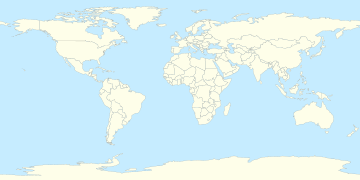

Image downloaded: https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/World_location_map.svg/360px-World_location_map.svg.png


Image downloaded: https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Red_pog.svg/8px-Red_pog.svg.png
How many audios you want to download? 1
Finished

 I can do the following: 
 1 - do depth first search 
 2 - do breadth first search 
 x - exit 
x


In [4]:
crawler()